In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 64

# load and normalize MNIST
transform = transforms.Compose(
    [transforms.ToTensor()])#,
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')



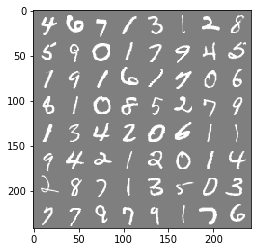

    4     6     7     1


torch.Size([64, 1, 28, 28])

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
images.shape

In [4]:
# Define the network
import torch.nn as nn
import torch.nn.functional as F

# use_gpu = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    
#### initialisation sample   

def weights_init(m):
    classname = m.__class__.__name__
    print(classname)
    if classname.find('Conv2d') != -1:
        #print(m.weight.data.shape, m.bias.data.shape)
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)
        # bias is the term in wx + b
    elif classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, 0.0, 1.0)
        nn.init.constant_(m.bias.data, 0.0)

    # uniform distribution
    #nn.init.uniform_(tensor, a=0, b=1)
    
    #normal distribution
    #nn.init.normal_(tensor, mean=0, std=1)
    #.........
net = Net()
    
print(net)
#net.apply(weights_init)

Net(
  (fc1): Linear(in_features=784, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)


In [5]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)
max_epoch = 50

for epoch in range(max_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
#         if use_gpu:
#             inputs = inputs.cuda()
#             labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backpropagation of the weights of linear layers as well as the convolutional layers
        optimizer.step() # dynamic learning rate

        # print statistics
        running_loss += loss.item()
        if i % 400 == 399:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   400] loss: 0.462
[1,   800] loss: 0.455
[2,   400] loss: 0.432
[2,   800] loss: 0.380
[3,   400] loss: 0.300
[3,   800] loss: 0.241
[4,   400] loss: 0.202
[4,   800] loss: 0.187
[5,   400] loss: 0.173
[5,   800] loss: 0.167
[6,   400] loss: 0.157
[6,   800] loss: 0.155
[7,   400] loss: 0.146
[7,   800] loss: 0.143
[8,   400] loss: 0.140
[8,   800] loss: 0.133
[9,   400] loss: 0.129
[9,   800] loss: 0.124
[10,   400] loss: 0.114
[10,   800] loss: 0.113
[11,   400] loss: 0.105
[11,   800] loss: 0.102
[12,   400] loss: 0.097
[12,   800] loss: 0.095
[13,   400] loss: 0.092
[13,   800] loss: 0.089
[14,   400] loss: 0.088
[14,   800] loss: 0.086
[15,   400] loss: 0.086
[15,   800] loss: 0.085
[16,   400] loss: 0.084
[16,   800] loss: 0.081
[17,   400] loss: 0.080
[17,   800] loss: 0.080
[18,   400] loss: 0.080
[18,   800] loss: 0.078
[19,   400] loss: 0.076
[19,   800] loss: 0.078
[20,   400] loss: 0.076
[20,   800] loss: 0.074
[21,   400] loss: 0.073
[21,   800] loss: 0.073
[22,   400

In [6]:
correct = 0
total = 0
flag = True
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if (flag):
#             print(images)
            single_input = images
            print(images.shape)
            print('------------------------')
            print(labels.shape)
            lable = labels
            flag = False
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

torch.Size([64, 1, 28, 28])
------------------------
torch.Size([64])
Accuracy of the network on the 10000 test images: 91 %


In [7]:
torch.save(net.state_dict(), "./datasets/nn1.pkl")

In [44]:
# save parameters as json file
# {
#   "layers": [2,2,1],
#   "input": [0.0, 0.0],
#   "label": 1,
#   "weights": {
#     "1": [[1.0,1.0],[1.0,1.0]],
#     "2": [[1.0], [-2.0]]
#   },
#   "biases": {
#     "1": [[0.0], [-1.0]],
#     "2": [[0.0]]
#   }
# }
import json

single_input_list = single_input[0][0].tolist()

# output = json.dumps(net.state_dict()["fc1.weight"].tolist())
output = {}

output['layers'] = [784, 8, 8, 8, 10] # [input, hidden layers, ..., output]

output_input = []
for i in range(28):
    for j in range(28):
        output_input.append(single_input_list[i][j])
output['input'] = output_input

output['label'] = lable.tolist()[0]

output_weights = {}
output_biases = {}
i = 1
for param_tensor in net.state_dict():
    if ('weight' in param_tensor):
        output_weights[str(i)] =  net.state_dict()[param_tensor].tolist()
        _T = [list(i) for i in zip(*output_weights[str(i)])]
        output_weights[str(i)] = _T
    if ('bias' in param_tensor):
        output_biases[str(i)] = net.state_dict()[param_tensor].tolist()
        i += 1
output['weights'] = output_weights
output['biases'] = output_biases

with open('./datasets/nn1.json', 'w') as f:
    json.dump(output, f)


In [40]:
np.shape(output_biases['1'])

(8,)

In [42]:
output_biases

{'1': [-0.3400254249572754,
  0.29992473125457764,
  -0.2351541668176651,
  -0.10340705513954163,
  -0.14482855796813965,
  0.5382973551750183,
  0.17008961737155914,
  -0.20808373391628265],
 '2': [-0.1012880951166153,
  -0.445179283618927,
  0.4563092887401581,
  -0.5846402049064636,
  0.5276255011558533,
  0.2961001992225647,
  -0.08243300765752792,
  -0.2787793278694153],
 '3': [-0.2138962745666504,
  0.37811896204948425,
  0.12742750346660614,
  0.14503422379493713,
  -0.0004599590029101819,
  -0.11501570045948029,
  0.08474891632795334,
  0.25087079405784607],
 '4': [0.6060215830802917,
  0.9034374356269836,
  0.5492926836013794,
  -0.6227919459342957,
  -0.24092237651348114,
  -0.06741389632225037,
  -0.08140788227319717,
  0.5086432099342346,
  -1.7465920448303223,
  -0.369319349527359]}